## GOAL: Create a model to predict whether or not a customer will Churn .

----
----
## Imports and Read in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**Checking the datatypes and non-null values in our dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Statistical summary of the numeric columns with .describe()

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**No null values are present in this data set**

**Balance of the class labels (Churn) with a Count Plot.**

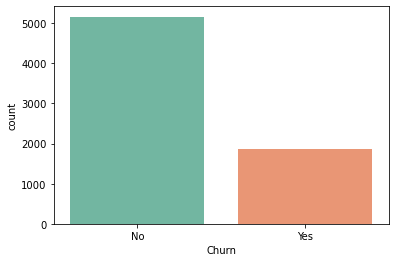

In [7]:

figure=sns.countplot(data=df,x='Churn',palette='Set2')


#### Data is a little imbalanced . Need AUC(Area Under Curve) instead of accuracy to evaluate Model.

In [8]:
churn_percent=round((df['Churn'].value_counts()['Yes']/len(df))*100,2)
print(f"Percentage of subscribers churned to date: {churn_percent}%")

Percentage of subscribers churned to date: 26.58%


### Box PLot of total charges vs contract type

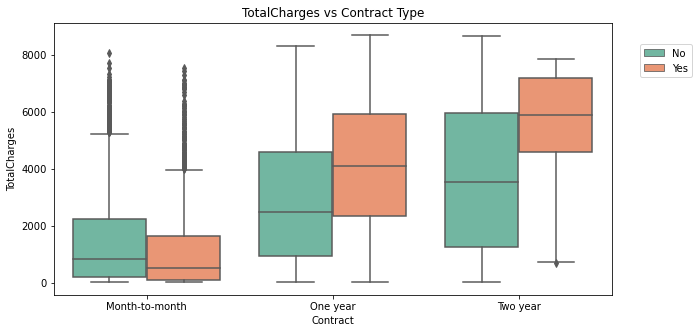

In [9]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn',palette='Set2');
plt.title("TotalCharges vs Contract Type")
plt.legend(loc=(1.05,0.8));

### Insights
- For month to month contract the average total charges does not vary much between Yes and No churn.
- Where as for a one year and 2 year contracts the average total charges are higher for Yes churn as compared to No churn.
- It can be interpreted as higher total charges in year based contracts may lead the customer to churn.

## Feature Correlation

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

**Feature correlation with respect to yes Churn.**

In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

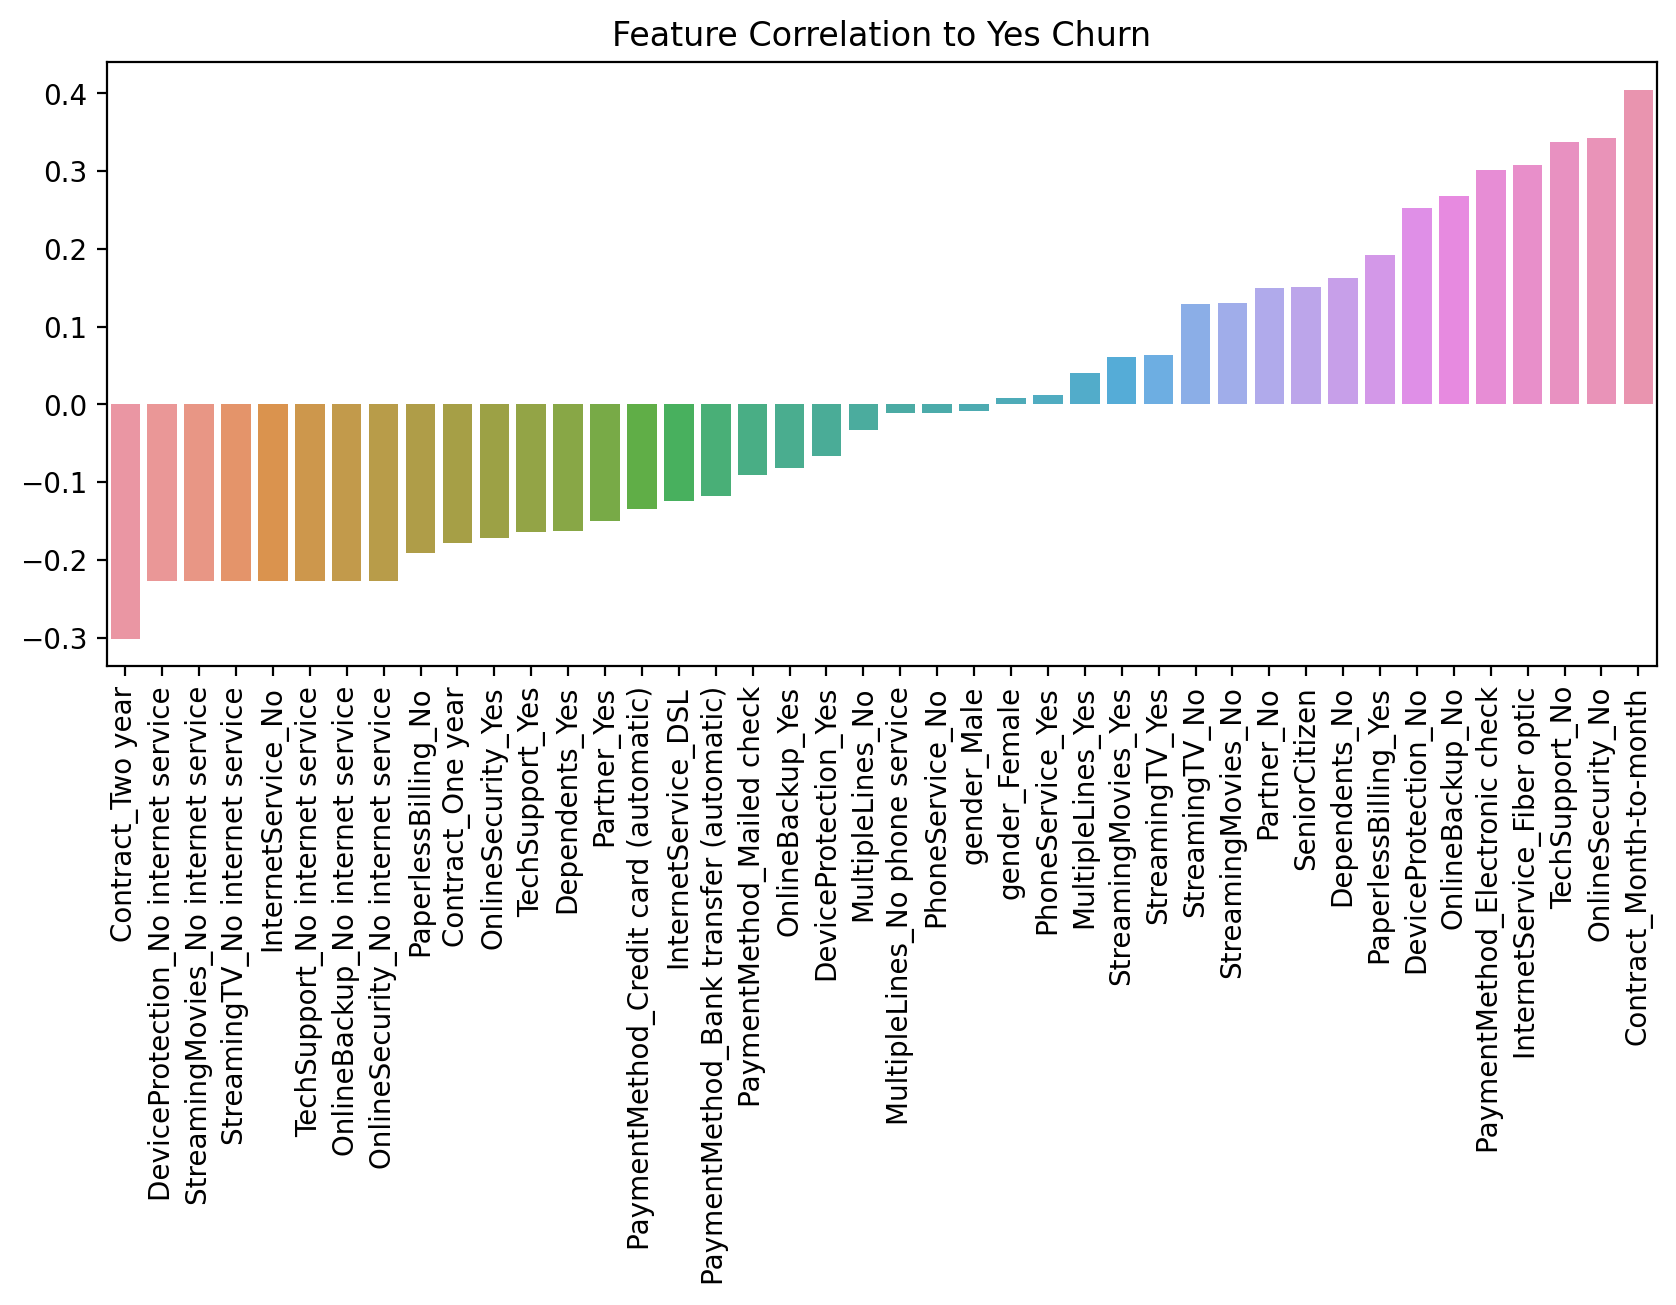

In [13]:
fig,ax=plt.subplots(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

### Insights
- Month to month contract has the highest positive correlation to yes churn.
- 2 year contract has the highest negative correlation to churning.

---
---

# Part 3: Cohort Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**What are the 3 contract types available?**

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### A histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.

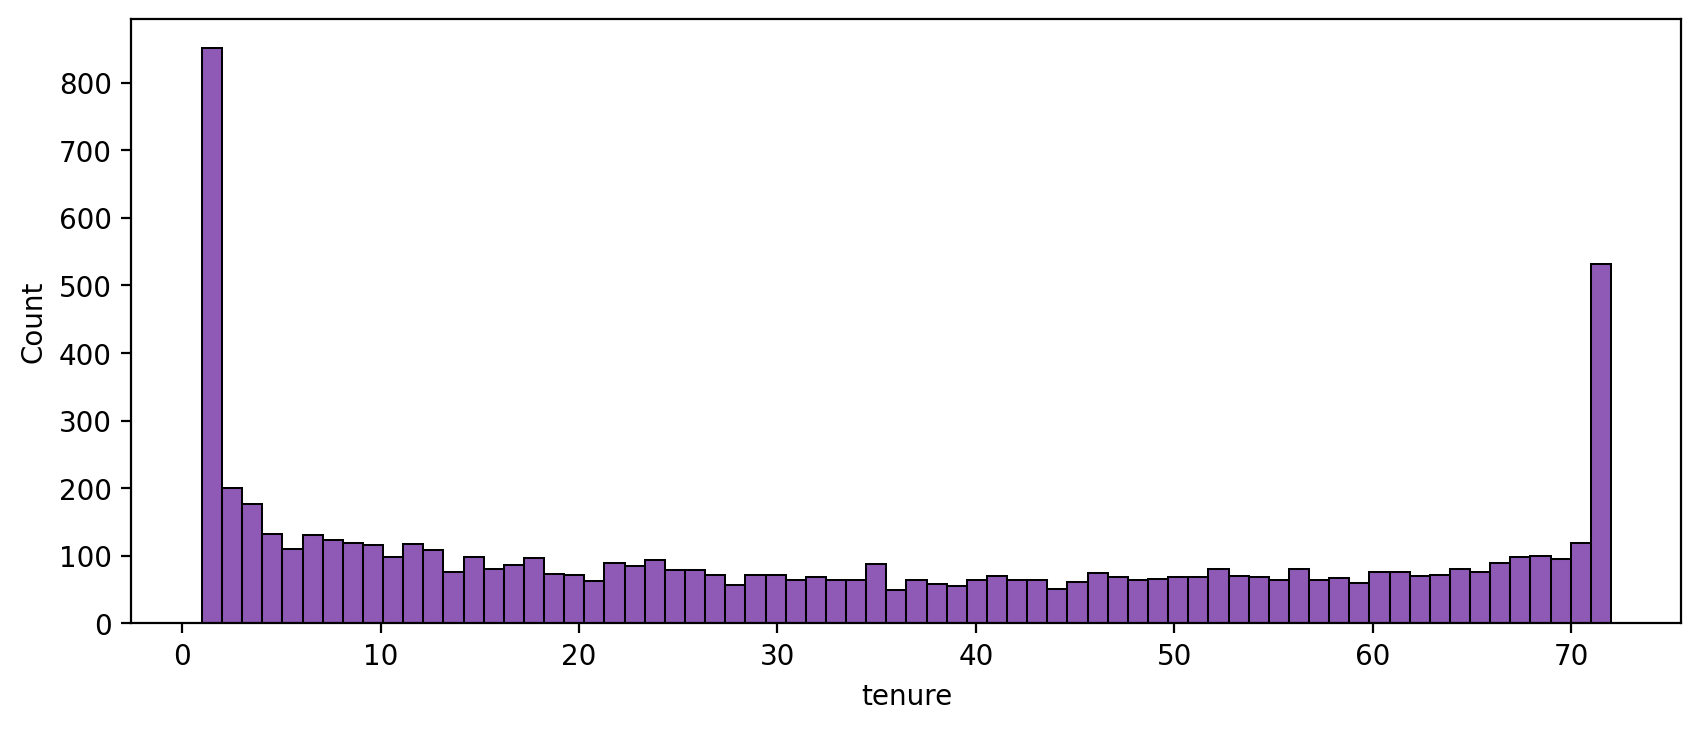

In [15]:
fig,ax=plt.subplots(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=70,color='#6a219e');

### Insights
- A large amount of customers(>800) are only subscribing for 1 or 2 months. It means a lot of customers are on month to month contract.
- The second highest count are customers subscribed for 72 months. These customers are long term customers who are pretty much locked into the service.

### Displaying histograms separated by two additional features, Churn and Contract.

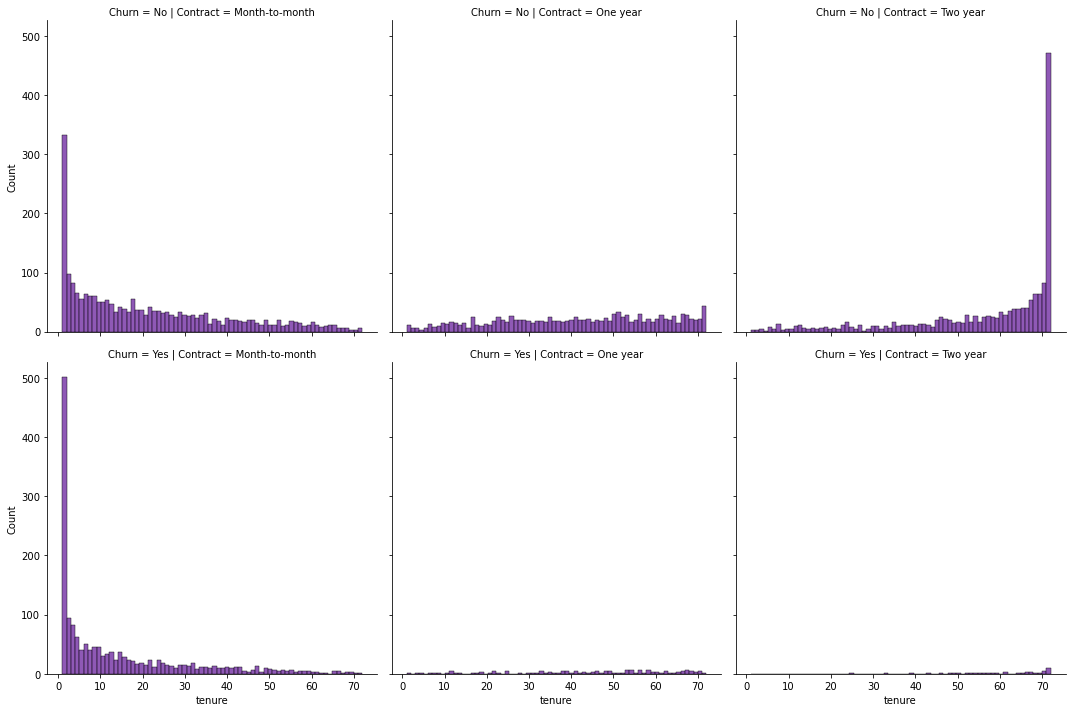

In [16]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn',color='#6a219e');

### Insights
- The churn for a One year and a Two year contract is pretty low.Customers with a two year contract are less likely to churn. 
- Even though the Yes-Churn and No-Churn is evenly split in month to month contract, the Churn rate is still comparitively much higher as compared to other contract types.
- There are also subscribers with month-to-month conracts for a tenure more than 30 months instead of getting a one year or two year contract.

### Scatter plot of Total Charges versus Monthly Charges

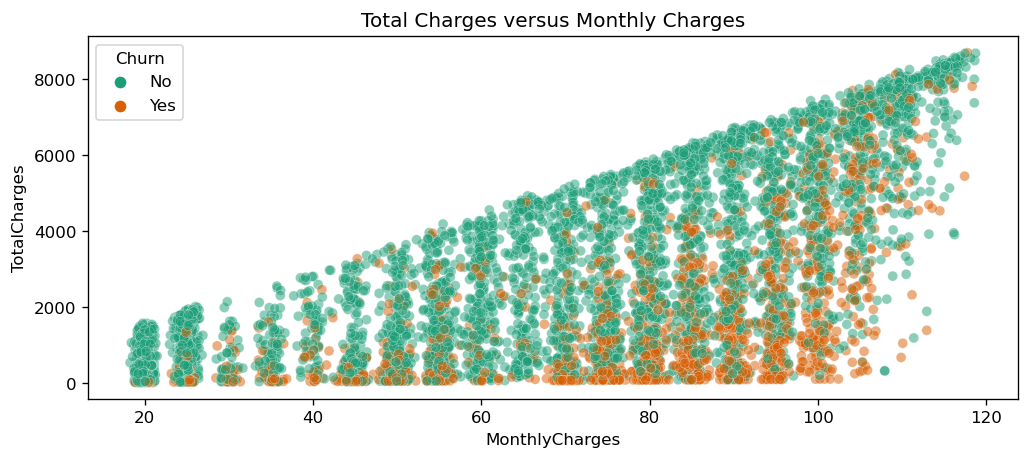

In [17]:
fig,ax=plt.subplots(figsize=(10,4),dpi=120)
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue='Churn',palette='Dark2',alpha=0.5,linewidth=0.3);
plt.title("Total Charges versus Monthly Charges");

### Insights
- A lot of people tend to churn as their monthly charges get higher.
- For people not churning, the average total charge gets higher with monthly charges.

## Cohort Analysis
------------
### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

In [18]:
df.groupby(['Churn','tenure']).count().transpose().head()

Churn           No                                        ... Yes            \
tenure          1    2    3   4   5   6   7   8   9   10  ...  63 64 65  66   
customerID     233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
gender         233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
SeniorCitizen  233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
Partner        233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   
Dependents     233  115  106  93  69  70  80  81  73  71  ...   4  4  9  13   

Churn                              
tenure         67 68 69  70 71 72  
customerID     10  9  8  11  6  6  
gender         10  9  8  11  6  6  
SeniorCitizen  10  9  8  11  6  6  
Partner        10  9  8  11  6  6  
Dependents     10  9  8  11  6  6  

[5 rows x 144 columns]

In [19]:
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']

In [21]:
churn_percent=100*(yes_churn/(yes_churn+no_churn))
churn_percent.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Now that we have Churn Rate per tenure group 1-72 months, creating a plot showing churn rate per months of tenure.**

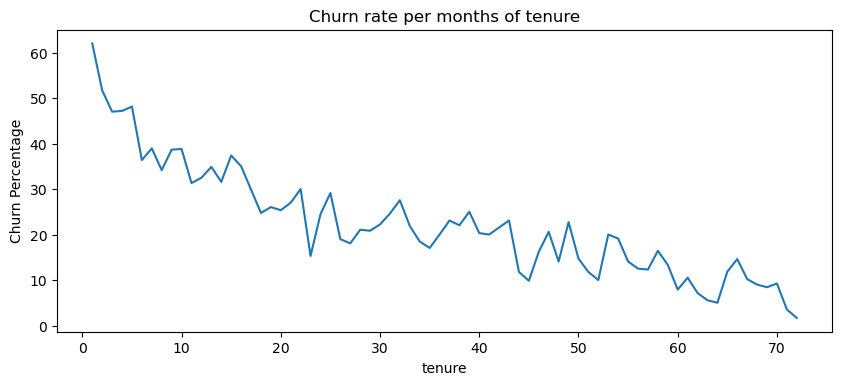

In [22]:
fig,ax=plt.subplots(figsize=(10,4),dpi=100)
churn_percent.transpose()['customerID'].plot()
plt.ylabel("Churn Percentage")
plt.title("Churn rate per months of tenure");

### Insights
- The churn percentage decreases with the increase in tenure.
- Those spikes in between may be interpreted as customers on month to month contract who churned.

### Broader Cohort Groups
**Based on the tenure column values, created a new column called Cohort Groups that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [23]:
def cohort(x):
    if x>0 and x<13:
        return '0-12 Months'
    elif x>12 and x<25:
        return '12-24 Months'
    elif x>24 and x<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [24]:
df['Cohort Groups']=np.vectorize(cohort)(df['tenure'])

In [25]:
df[['tenure','Cohort Groups']]

,tenure,Cohort Groups
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


**Scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort.**

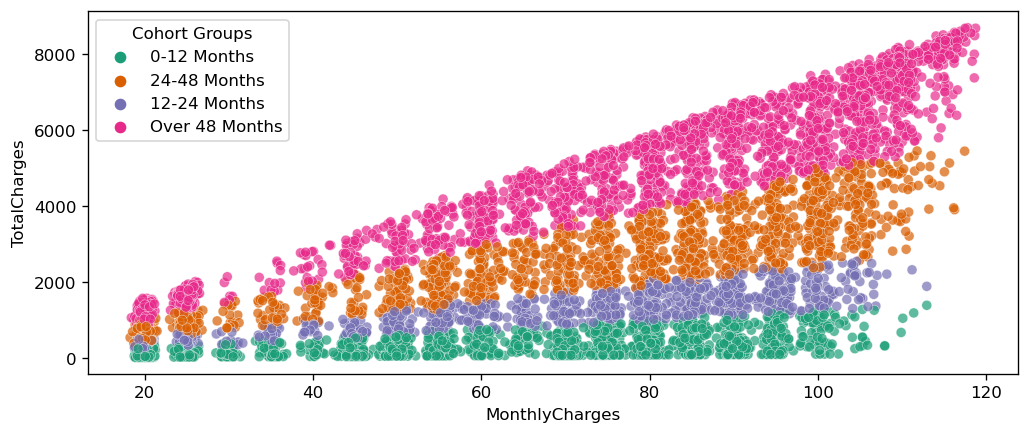

In [26]:
fig,ax=plt.subplots(figsize=(10,4),dpi=120)
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue='Cohort Groups',palette='Dark2',alpha=0.7,linewidth=0.3);

### Insights
- For the lower monthly charges, the behaviour is relatively equal across all cohorts.
- Not much total charges are obtained from people staying for 12 months versus the the people staying for over 48 months 

### Count plot showing the churn count per cohort.

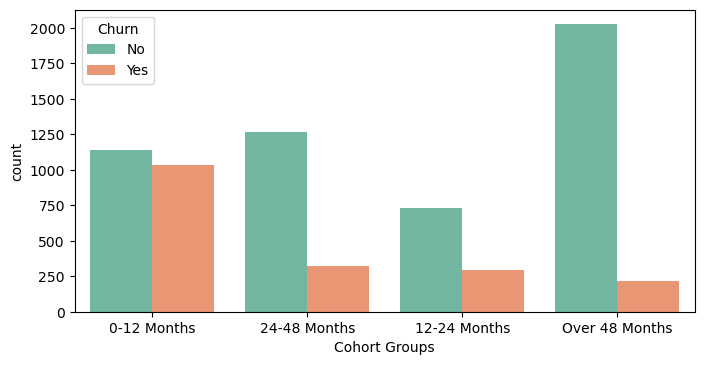

In [27]:
fig,ax=plt.subplots(figsize=(8,4),dpi=100)
sns.countplot(data=df,x='Cohort Groups',hue='Churn',palette='Set2');

### Insights
- People with 0-12 Months tenure are most likely to churn despite the churn distriburtion between Yes and No being even in this cohort.
- Customers with over 48 months tenure are least likely to churn.

**Grid of Count Plots showing counts per Tenure Cohort, separated out by contract type.**

<Figure size 2000x800 with 0 Axes>

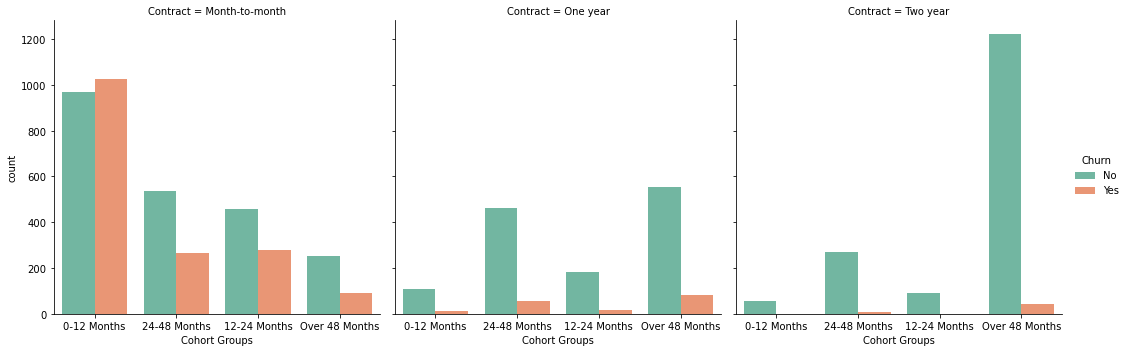

In [28]:
plt.figure(figsize=(10,4),dpi=200);
sns.catplot(data=df,x='Cohort Groups',hue='Churn',col='Contract',kind='count',palette='Set2');

### Insighst
- People with a one year or a two year contracts, regardless of how long they stay on the service are less likely to churn.


# Part 4: Predictive Modeling
----
**Lets explore the accuracies of 3 different models**
- LogisticRegression
- RandomForestClassifier
- AdaBoostClassifier

### Feature Engineering

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [30]:
X=df.drop(['Churn','customerID','Cohort Groups'],axis=1)
y=df['Churn']

Encoding Categorical Data & output Label

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [32]:
trf=ColumnTransformer(transformers=[('trf1',OneHotEncoder(sparse=False,drop='first'),
                                     ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
                                    ],remainder='passthrough')

In [33]:
X_transformed=trf.fit_transform(X)
le=LabelEncoder()
y_transformed=le.fit_transform(y)

### Since the Data was unbalanced, we are going to do Over Sampling Using SMOTE.

In [34]:
sm=SMOTE(random_state=41)
X_res,y_res=sm.fit_resample(X_transformed,y_transformed)

Train-Test Split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X_res,y_res,test_size=0.1,random_state=101)

### LogisticRegression Model

In [36]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(max_iter=500)
Lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [37]:
y_pred=Lr.predict(X_test)

In [38]:
auc=roc_auc_score(y_test, y_pred)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       502
           1       0.78      0.79      0.79       531

    accuracy                           0.78      1033
   macro avg       0.78      0.78      0.78      1033
weighted avg       0.78      0.78      0.78      1033



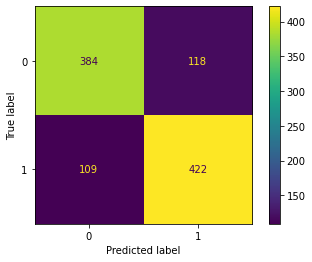

In [40]:
plot_confusion_matrix(Lr,X_test,y_test)

In [41]:
print('Test accuracy', accuracy_score(y_test,y_pred))
print('Test Area Under ROC', auc)

Test accuracy 0.7802516940948693
Test Area Under ROC 0.7798335846819876


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=rf.predict(X_test)

In [44]:
auc=roc_auc_score(y_test, y_pred)

Adaboost Classifier

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       502
           1       0.89      0.83      0.86       531

    accuracy                           0.86      1033
   macro avg       0.86      0.86      0.86      1033
weighted avg       0.86      0.86      0.86      1033



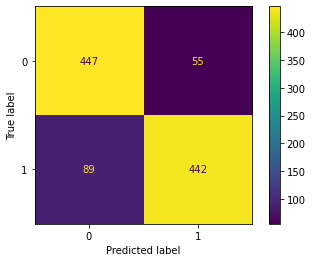

In [46]:
plot_confusion_matrix(rf,X_test,y_test)

In [47]:
print('Test accuracy', accuracy_score(y_test,y_pred))
print('Test Area Under ROC', auc)

Test accuracy 0.8606001936108422
Test Area Under ROC 0.861414980379799


### AdaBoost Classifier Model

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [49]:
y_pred=ada_model.predict(X_test)

In [50]:
auc=roc_auc_score(y_test, y_pred)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       502
           1       0.87      0.87      0.87       531

    accuracy                           0.87      1033
   macro avg       0.87      0.87      0.87      1033
weighted avg       0.87      0.87      0.87      1033



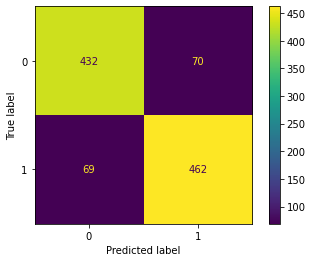

In [52]:
plot_confusion_matrix(ada_model,X_test,y_test);

In [53]:
print('Test accuracy', accuracy_score(y_test,y_pred))
print('Test Area Under ROC', auc)

Test accuracy 0.8654404646660213
Test Area Under ROC 0.865307133049722


**It can be seen that Adaboost had greater Test accuracy(86%) and AUC>0.85 is a high classification accuracy .**